In [1]:
#f=root(1-x^2) a semi circle
import numpy as np
def f(x):
    return np.sqrt(1-x**2)
N=20000
X=np.linspace(-1,1,N)
h=2/N
integ=0
for x in X:
    integ+=f(x)*h
integ

%matplotlib qt5


# Trapezoidal Rule



In [3]:
def f(x):
    return x**4-2*x+1 #Function here
N= #Number Of Divisions
a= #start range
b= #end range
h=(b-a)/N
integ=f(a)/2+f(b)/2
for i in range(1,N):
    integ+=f(a+i*h)
integ*=h
print(integ) #Final Solution
    

SyntaxError: invalid syntax (<ipython-input-3-b8b982a6a49c>, line 3)

# Exercise 5.1

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt5


In [5]:
data=np.loadtxt('velocities.txt')

In [6]:
time=data[:,0]
velo=data[:,1]
N=len(time)-1
h=(time.max()-time.min())/N
s=velo.max()/2+velo.min()/2
disp=[0]
for i in range(1,101):
    s+=velo[i]
    disp.append(s*h)
integ=s*h
print(integ)
disp=np.array(disp)
velo.max()
    

8.499406000000024


0.864945

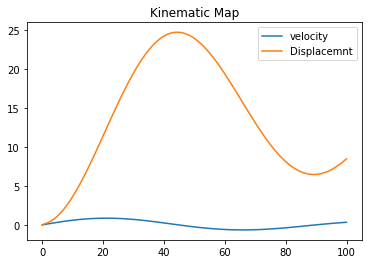

In [7]:
plt.plot(time,velo, label='velocity')
plt.plot(time,disp, label='Displacemnt')
plt.title('Kinematic Map')
plt.legend()
#plt.xlim(0,100)
#plt.grid()

# Simspson's Rule
## Exercise 5.2


In [8]:
def f(x):
    return x**4-2*x+1 #function here
a=#start range
b=#end range
N=#Number of Divisions
h=(b-a)/N
s=f(a)+f(b)
for i in range(1,N,2):
    s+=4*f(a+i*h)
for i in range(2,N-1,2):
    s+=2*f(a+i*h)
s=s*h/3 
print(s)#Final Value

SyntaxError: invalid syntax (<ipython-input-8-dc1d5d8f3e1f>, line 3)

## Exercise 5.3

In [9]:
def E(limit):
    
    def f(x):
        return np.exp(-x**2)
    a=0
    b=limit
    N=100
    h=(b-a)/N
    s=f(a)+f(b)
    for i in range(1,N,2):
        s+=4*f(a+i*h)
    for i in range(2,N-1,2):
        s+=2*f(a+i*h)
    s=s*h/3
    return s

In [10]:
x=np.array([0+i*0.1 for i in range(31)])
y=E(x)

Text(0, 0.5, 'E(x)')

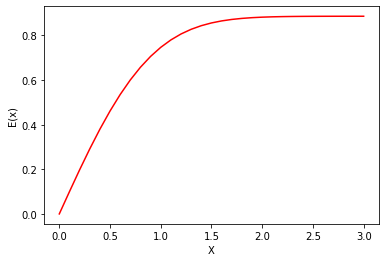

In [11]:
plt.plot(x,y,'r-')
plt.xlabel('X')
plt.ylabel('E(x)')

## Exercise 5.4

In [6]:
def J(m,x):
    def f(t):
        return np.cos(m*t-x*np.sin(t))
    a=0
    b=np.pi
    N=1000
    h=(b-a)/N
    s=f(a)+f(b)
    for i in range(1,N,2):
        s+=4*f(a+i*h)
    for j in range(2,N-1,2):
        s+=2*f(a+j*h)
    s*=h/3
    return (1/(np.pi)*s)


In [7]:
x=np.linspace(0,20,100)
j0=J(0,x)
j1=J(1,x)
j2=J(2,x)

In [13]:
plt.plot(x,j0,'b-', label=('$J_0(x)$'))
plt.plot(x,j1,'r-', label=('$J_1(x)$'))
plt.plot(x,j2,'g-', label=('$J_2(x)$'))
plt.xlabel('X')
plt.ylabel('$J_m{(X)}$')
plt.title('Bessel Functions for m=0,1,2')
plt.legend()

In [14]:
focal_plane=np.array([[0 for i in range(500)] for i in range(500)])
center=(250,250)
wavelength=62.5
k=2*np.pi/wavelength

In [15]:
def dist(point):
    x0,y0=center
    x,y=point
    return np.sqrt((x0-x)**2+(y0-y)**2)    

In [16]:
def I(r):
    return ((J(1,k*r))/(k*r))**2


In [17]:
for i in range(500):
    for j in range(500):
        focal_plane[i][j]=dist((i,j))

In [18]:
focal_plane[250,250]=1

In [19]:
fp2=I(focal_plane)

In [20]:
fp2[250,250]=0.5
mean=fp2.mean()
std=fp2.std()
print(mean,std)

0.0012582219650261505 0.012217794550843535


In [28]:
plt.imshow(fp2,'cividis' ,vmax=mean+0.5*std, interpolation='bicubic')